## Credit Card Fraud Detection using CNN

Watch Full Video Here: https://youtu.be/XFnLN84Fz24

In [ ]:
#!pip install tensorflow-gpu==2.0.0-rc0
# Keep your eyes for update: https://www.tensorflow.org/

In [32]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers.legacy import Adam
print(tf.__version__)

2.14.0


In [33]:
import pandas as pd
import numpy as np
import  seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [34]:
data = pd.read_csv('creditcard_2023.csv')
data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [35]:
data.shape

(568630, 31)

In [36]:
data.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [38]:
data['Class'].value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

### Balance Dataset 

In [39]:
non_fraud = data[data['Class']==0]
fraud = data[data['Class']==1]

In [40]:
non_fraud.shape, fraud.shape

((284315, 31), (284315, 31))

In [41]:
non_fraud = non_fraud.sample(fraud.shape[0])
non_fraud.shape

(284315, 31)

In [42]:
data= pd.concat([fraud, non_fraud], ignore_index=True)
data

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,541,-0.478427,0.142165,-0.046838,0.683350,0.067820,-0.404898,-0.206496,0.184366,-0.762935,...,0.098977,-0.075191,-0.481489,0.678900,-0.011520,0.409021,0.075859,-0.447139,1534.53,1
1,623,-0.617111,-1.733888,1.150655,0.207829,0.903533,-0.171524,0.551679,-0.167744,0.338861,...,0.153856,0.369734,1.471004,-0.497633,0.377656,-0.328051,-0.512415,-0.013653,10554.68,1
2,4920,-0.476617,0.088942,0.326333,0.220370,-0.026730,0.432409,0.646165,-0.240646,0.356997,...,-0.223141,-0.851929,0.153117,-0.127032,-0.334872,-1.353308,-0.192302,-0.470796,2785.98,1
3,6108,-0.832953,-0.024254,-0.260967,0.323532,-0.117119,-0.589167,-0.390612,-0.207889,0.351702,...,0.120451,0.121804,-0.453630,-0.064071,0.331833,-1.671579,-1.060239,1.939783,15897.18,1
4,6329,1.020308,0.425645,-0.554113,0.868349,2.367343,-0.360087,1.185828,-0.261569,-0.159521,...,-0.258401,-0.661236,-0.663639,-2.536292,2.502489,1.195597,-0.249226,0.254373,3492.59,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,134130,0.024238,-0.109282,1.399675,-0.581570,0.282125,0.054964,0.682111,-0.143597,0.249571,...,-0.188179,-0.494120,0.045192,0.743997,-0.516469,0.197360,0.075647,0.139388,8734.09,0
568626,273237,2.037352,-0.991223,0.054473,-1.567158,-0.093711,0.171862,0.126856,-0.190521,-0.092175,...,-0.179010,-0.163226,0.194935,0.932479,-0.307092,-0.408756,-0.243861,-0.207545,18792.21,0
568627,172547,1.807410,-0.864722,0.306110,-1.068073,-0.168473,0.114705,0.116249,-0.149969,0.475896,...,0.048911,1.025580,0.101752,0.227840,-0.442189,-0.250830,-0.239814,-0.232085,17409.78,0
568628,211580,0.048257,0.033553,0.258516,-0.990467,0.902024,-0.535638,1.047463,-0.222885,0.289413,...,-0.037862,0.495707,-0.523352,-0.555446,0.386354,-0.488800,-0.067971,0.386160,1123.14,0


In [43]:
data['Class'].value_counts()

Class
1    284315
0    284315
Name: count, dtype: int64

In [44]:
X = data.drop('Class', axis = 1)
y = data['Class']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [46]:
X_train.shape, X_test.shape

((454904, 30), (113726, 30))

In [47]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [49]:
X_train.shape

(454904, 30)

In [50]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [51]:
X_train.shape, X_test.shape

((454904, 30, 1), (113726, 30, 1))

### Build CNN 

In [52]:
epochs = 20
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))


In [53]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 29, 32)            96        
                                                                 
 batch_normalization_2 (Bat  (None, 29, 32)            128       
 chNormalization)                                                
                                                                 
 dropout_3 (Dropout)         (None, 29, 32)            0         
                                                                 
 conv1d_3 (Conv1D)           (None, 28, 64)            4160      
                                                                 
 batch_normalization_3 (Bat  (None, 28, 64)            256       
 chNormalization)                                                
                                                                 
 dropout_4 (Dropout)         (None, 28, 64)           

In [54]:
model.compile(optimizer=Adam(learning-rate=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])

/Users/minnie/Credit-Card-Fraud-Detection-using-CNN-in-TensorFlow-2.0/tensor/lib/python3.9/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [55]:
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
14216/14216 [==============================] - 48s 3ms/step - loss: 0.0230 - accuracy: 0.9924 - val_loss: 0.0033 - val_accuracy: 0.9993
Epoch 2/20
14216/14216 [==============================] - 48s 3ms/step - loss: 0.0060 - accuracy: 0.9983 - val_loss: 0.0027 - val_accuracy: 0.9995
Epoch 3/20
14216/14216 [==============================] - 43s 3ms/step - loss: 0.0050 - accuracy: 0.9987 - val_loss: 0.0022 - val_accuracy: 0.9995
Epoch 4/20
14216/14216 [==============================] - 43s 3ms/step - loss: 0.0041 - accuracy: 0.9989 - val_loss: 0.0022 - val_accuracy: 0.9994
Epoch 5/20
14216/14216 [==============================] - 43s 3ms/step - loss: 0.0039 - accuracy: 0.9990 - val_loss: 0.0021 - val_accuracy: 0.9995
Epoch 6/20
14216/14216 [==============================] - 43s 3ms/step - loss: 0.0036 - accuracy: 0.9991 - val_loss: 0.0019 - val_accuracy: 0.9996
Epoch 7/20
14216/14216 [==============================] - 42s 3ms/step - loss: 0.0031 - accuracy: 0.9993 - val_loss: 0

In [56]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

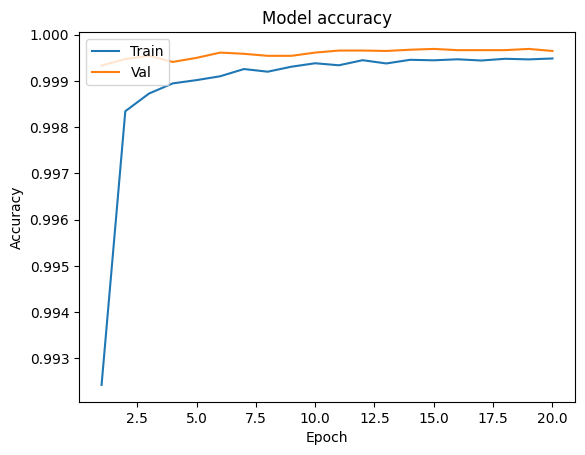

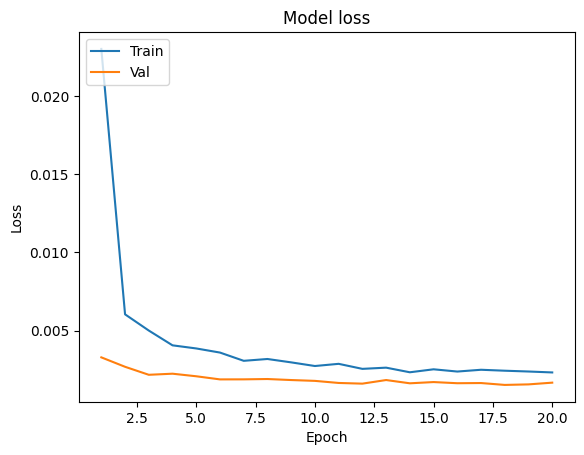

In [57]:
plot_learningCurve(history, epochs)

### Adding MaxPool 

Epoch 1/50
14216/14216 [==============================] - 31s 2ms/step - loss: 0.0854 - accuracy: 0.9706 - val_loss: 0.0112 - val_accuracy: 0.9969
Epoch 2/50
14216/14216 [==============================] - 31s 2ms/step - loss: 0.0247 - accuracy: 0.9923 - val_loss: 0.0078 - val_accuracy: 0.9982
Epoch 3/50
14216/14216 [==============================] - 33s 2ms/step - loss: 0.0186 - accuracy: 0.9944 - val_loss: 0.0059 - val_accuracy: 0.9986
Epoch 4/50
14216/14216 [==============================] - 33s 2ms/step - loss: 0.0151 - accuracy: 0.9956 - val_loss: 0.0055 - val_accuracy: 0.9987
Epoch 5/50
14216/14216 [==============================] - 33s 2ms/step - loss: 0.0144 - accuracy: 0.9958 - val_loss: 0.0050 - val_accuracy: 0.9989
Epoch 6/50
14216/14216 [==============================] - 33s 2ms/step - loss: 0.0133 - accuracy: 0.9962 - val_loss: 0.0044 - val_accuracy: 0.9990
Epoch 7/50
14216/14216 [==============================] - 33s 2ms/step - loss: 0.0123 - accuracy: 0.9966 - val_loss: 0

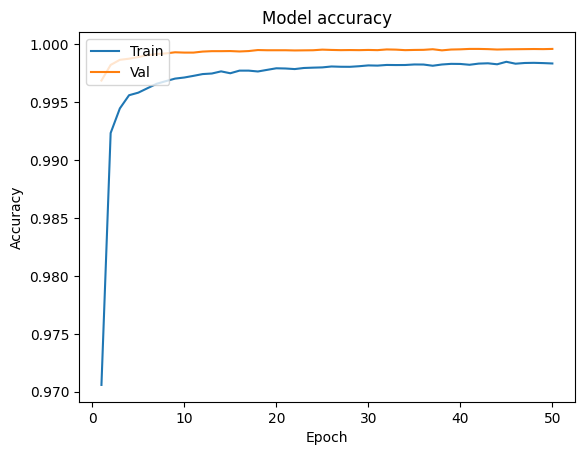

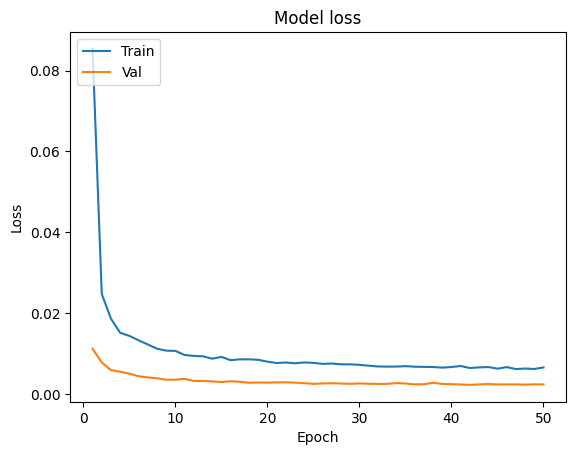

In [58]:
epochs = 50
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)
plot_learningCurve(history, epochs)

In [59]:
!mkdir -p saved_model

In [60]:
model.save('saved_model/ccfrauddetection')

INFO:tensorflow:Assets written to: saved_model/ccfrauddetection/assets


INFO:tensorflow:Assets written to: saved_model/ccfrauddetection/assets
